# Imports and settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from tabulate import tabulate
from IPython.display import display, HTML

# Settings
pd.set_option ( 'display.float_format', lambda x: '% .2f' % x)
sns.set(rc = {'figure.figsize':(15,8)})
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv('datasets\\kc_house_data.csv')

# Data Processing

## Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data adjust types

In [4]:
df['date'] = pd.to_datetime(df['date'])

## Data cleaning

In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Droping duplicate data
df = df.drop_duplicates(keep='last')

## Add new features

In [7]:
df['house_age'] = df['yr_built'].apply(lambda x: 2015 - x)
df['renovation_age'] = df['yr_renovated'].apply(lambda x: 2015 - x if x > 0 else 0)

df['house_type'] = df['bedrooms'].apply(lambda x: 'studio' if x <= 1 else 
                                                  'apartment' if (x > 1) & (x <= 3) else 'house')

df['condition_evaluation'] = df['condition'].apply(lambda x: '1_bad' if x <= 2 else
                                                             '2_regular' if (x > 2) & (x < 5) else
                                                             '3_good')

df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df['season_of_sale'] = df['month'].apply(lambda x: 'winter' if (x == 12) | (x == 1) | (x == 2) else
                                                   'spring' if (x > 2) & (x < 6) else
                                                   'fall' if (x > 8) & (x < 12) else
                                                   'summer')

df2 = df.drop(['condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axis=1)

## Adjusting features

In [8]:
df2['bathrooms'] = df2['bathrooms'].round().astype('int64')

# Convert sqft to m²
df2['sqft_living'] = df2['sqft_living'].apply(lambda x: x/10.764 if x > 0 else 0)
df2['sqft_lot'] = df2['sqft_lot'].apply(lambda x: x/10.764 if x > 0 else 0)
df2['sqft_above'] = df2['sqft_above'].apply(lambda x: x/10.764 if x > 0 else 0)
df2['sqft_basement'] = df2['sqft_basement'].apply(lambda x: x/10.764 if x > 0 else 0)
df2['bathrooms'] = df2['bathrooms'].round()

df2 = df2.rename(columns={'sqft_living':'m2_living',
                          'sqft_lot':'m2_lot',
                          'sqft_above':'m2_above',
                          'sqft_basement':'m2_basement'})

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21613 non-null  int64         
 1   date                  21613 non-null  datetime64[ns]
 2   price                 21613 non-null  float64       
 3   bedrooms              21613 non-null  int64         
 4   bathrooms             21613 non-null  int64         
 5   m2_living             21613 non-null  float64       
 6   m2_lot                21613 non-null  float64       
 7   floors                21613 non-null  float64       
 8   waterfront            21613 non-null  int64         
 9   view                  21613 non-null  int64         
 10  m2_above              21613 non-null  float64       
 11  m2_basement           21613 non-null  float64       
 12  zipcode               21613 non-null  int64         
 13  lat             

## Descriptive Statistics

In [10]:
num_attributes = df2.select_dtypes(exclude=['object', 'datetime64'] )
cat_attributes = df2.select_dtypes(include=['object'])

In [11]:
# Central tendency metrics
mean = pd.DataFrame(num_attributes.apply(np.mean))
median = pd.DataFrame(num_attributes.apply(np.median))

# Dispersion metrics
std = pd.DataFrame(num_attributes.apply(np.std))
min_ = pd.DataFrame(num_attributes.apply(np.min))
max_ = pd.DataFrame(num_attributes.apply(np.max))

# Concat
num_stats = pd.concat([min_, max_, mean, median, std], axis=1).reset_index()
num_stats.columns = ['attributes', 'min', 'max', 'mean', 'median', 'std']
num_stats

,attributes,min,max,mean,median,std
0,id,1000102.00,9900000190.00,4580301520.86,3904930410.00,2876499023.43
1,price,75000.00,7700000.00,540088.14,450000.00,367118.70
2,bedrooms,0.00,33.00,3.37,3.00,0.93
3,bathrooms,0.00,8.00,2.06,2.00,0.76
4,m2_living,26.94,1257.90,193.23,177.44,85.32
5,m2_lot,48.31,153414.99,1403.47,707.73,3847.97
6,floors,1.00,3.50,1.49,1.50,0.54
7,waterfront,0.00,1.00,0.01,0.00,0.09
8,view,0.00,4.00,0.23,0.00,0.77
9,m2_above,26.94,874.21,166.15,144.93,76.93


# Data Exploration

## Hypothesis validation

### H1 - Better view, bigger price
* True



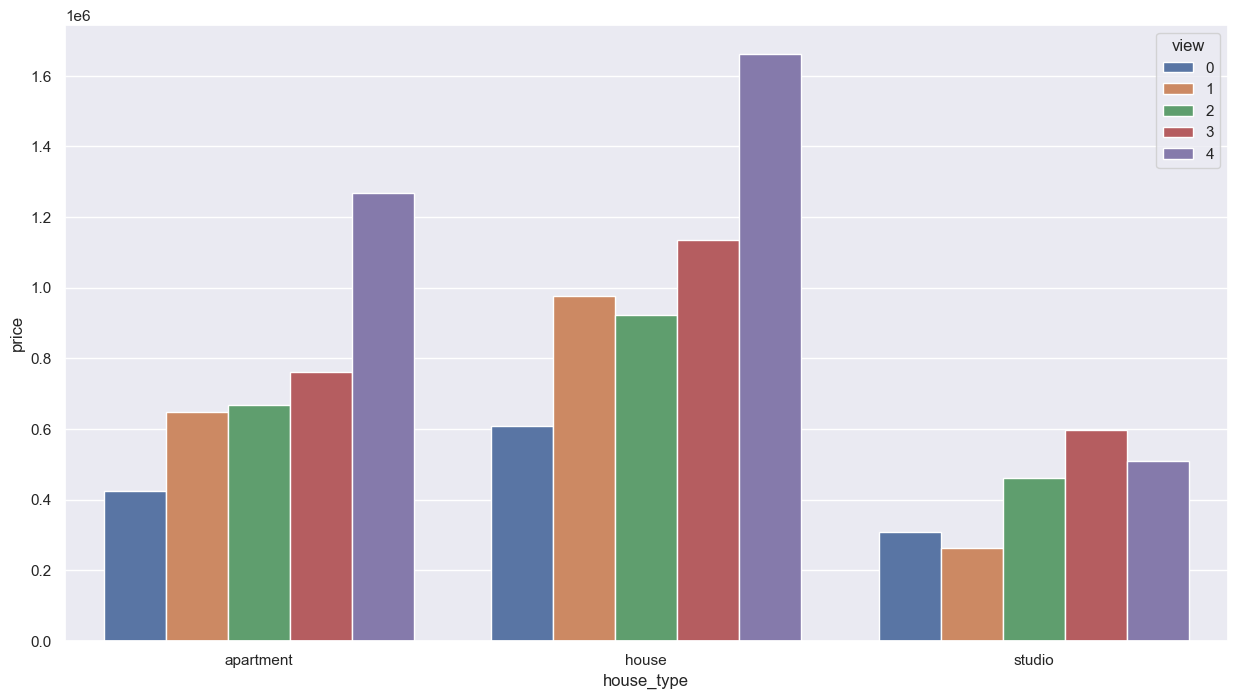

In [12]:
h1 = df2[['house_type', 'view', 'price']].groupby(['house_type', 'view']).mean().reset_index()
sns.barplot(data=h1, x='house_type', y='price', hue='view');

### H2 - Properties in better conditions have a price difference 10% higher than those in immediately inferior condition.
* False. Price difference is bigger than 10% in some cases or negative in other cases.

In [13]:
h2 = df2[['condition_evaluation', 'house_type', 'price']].groupby(['house_type', 'condition_evaluation']).mean().reset_index()

h2_aux1 = h2.loc[h2['house_type'] == 'apartment']
h2_aux1['%_var'] = ((h2_aux1['price'].pct_change())*100)

h2_aux2 = h2.loc[h2['house_type'] == 'house']
h2_aux2['%_var'] = (h2_aux2['price'].pct_change())*100

h2_aux3 = h2.loc[h2['house_type'] == 'studio']
h2_aux3['%_var'] = (h2_aux3['price'].pct_change())*100

# print config
css = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(css))

display(h2_aux1)
display(h2_aux2)
display(h2_aux3)

,house_type,condition_evaluation,price,%_var
0,apartment,1_bad,293227.92,NaN
1,apartment,2_regular,450157.88,53.52
2,apartment,3_good,498903.60,10.83


,house_type,condition_evaluation,price,%_var
3,house,1_bad,468165.11,NaN
4,house,2_regular,664125.84,41.86
5,house,3_good,755530.20,13.76


,house_type,condition_evaluation,price,%_var
6,studio,1_bad,247470.59,NaN
7,studio,2_regular,330848.82,33.69
8,studio,3_good,315179.17,-4.74


### H3 - Larger lot size means higher prices, regardless of the building conservation.
* False. Smaller lots has higher prices

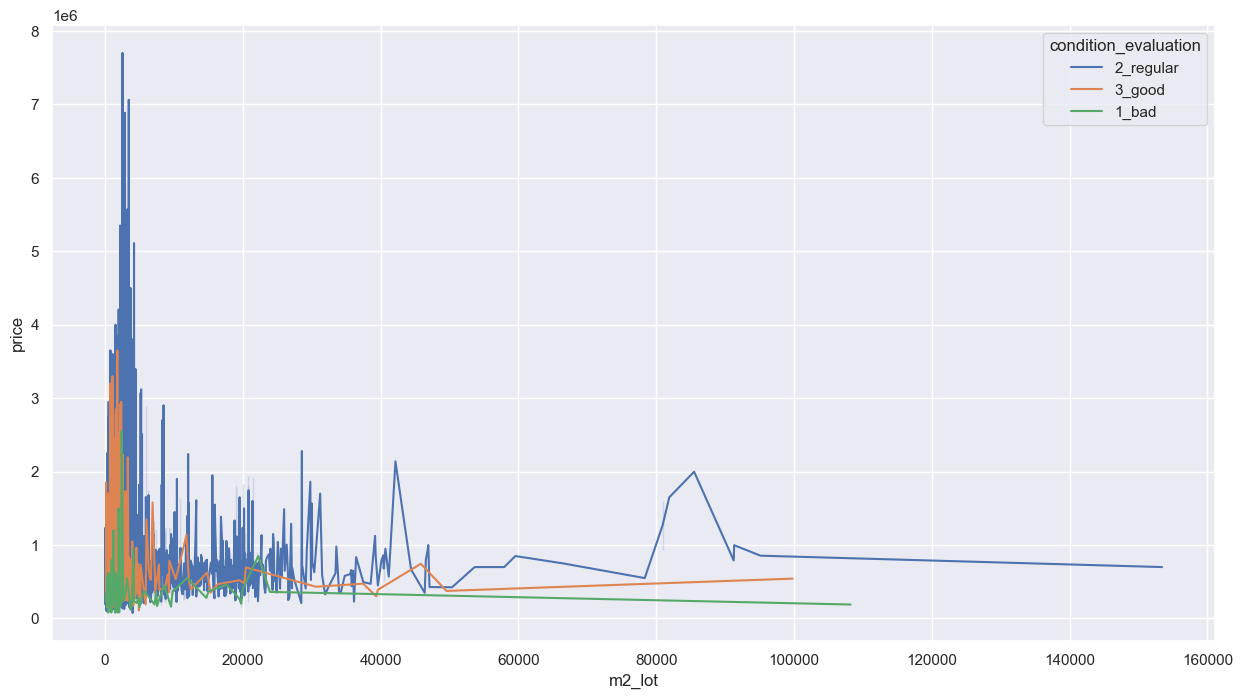

In [14]:
h3 = df2[['price', 'condition_evaluation', 'm2_lot']]
sns.lineplot(data=h3, y='price', x='m2_lot', hue='condition_evaluation');


### H4 - Properties with a water view are 20% more expensive than properties without a water view.
* False. The price increase is more than 20%.

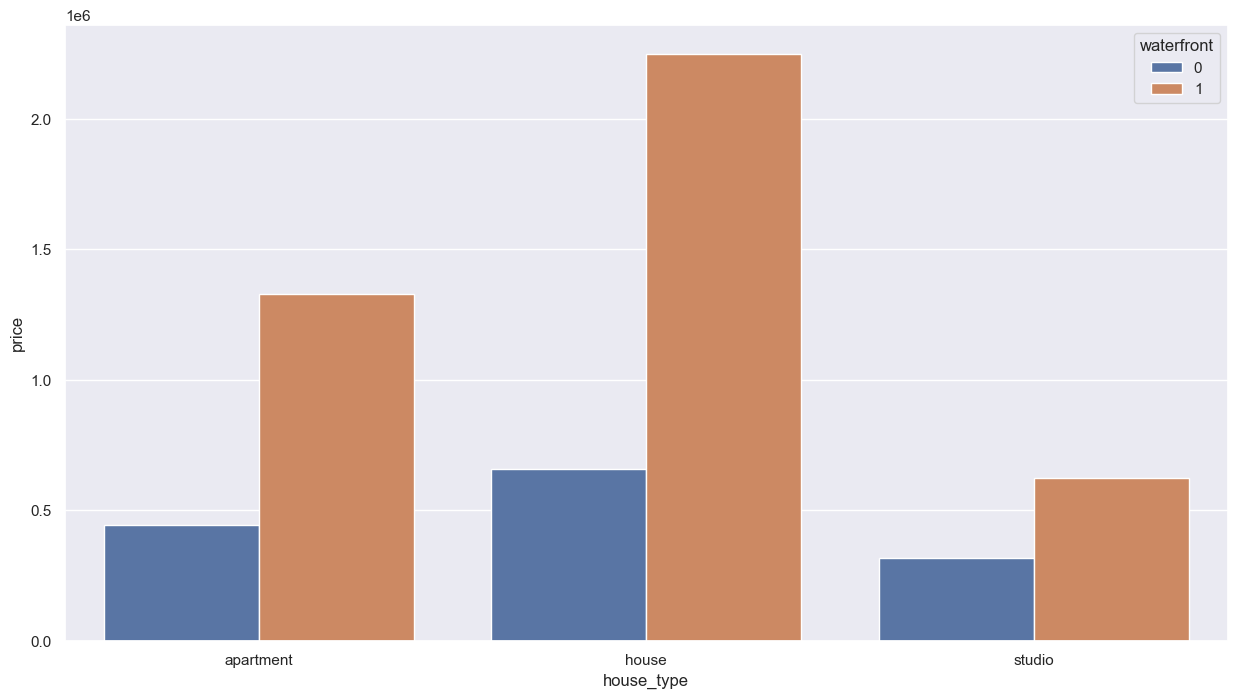

In [15]:
h4 = df2[['waterfront','house_type', 'price']].groupby(['waterfront', 'house_type']).mean().reset_index()
sns.barplot(data=h4, x='house_type', y='price', hue='waterfront');


### H5 - Adding an extra bathroom makes the property more expensive by 5% per additional bathroom.
* False. The price increase is more than 5%.

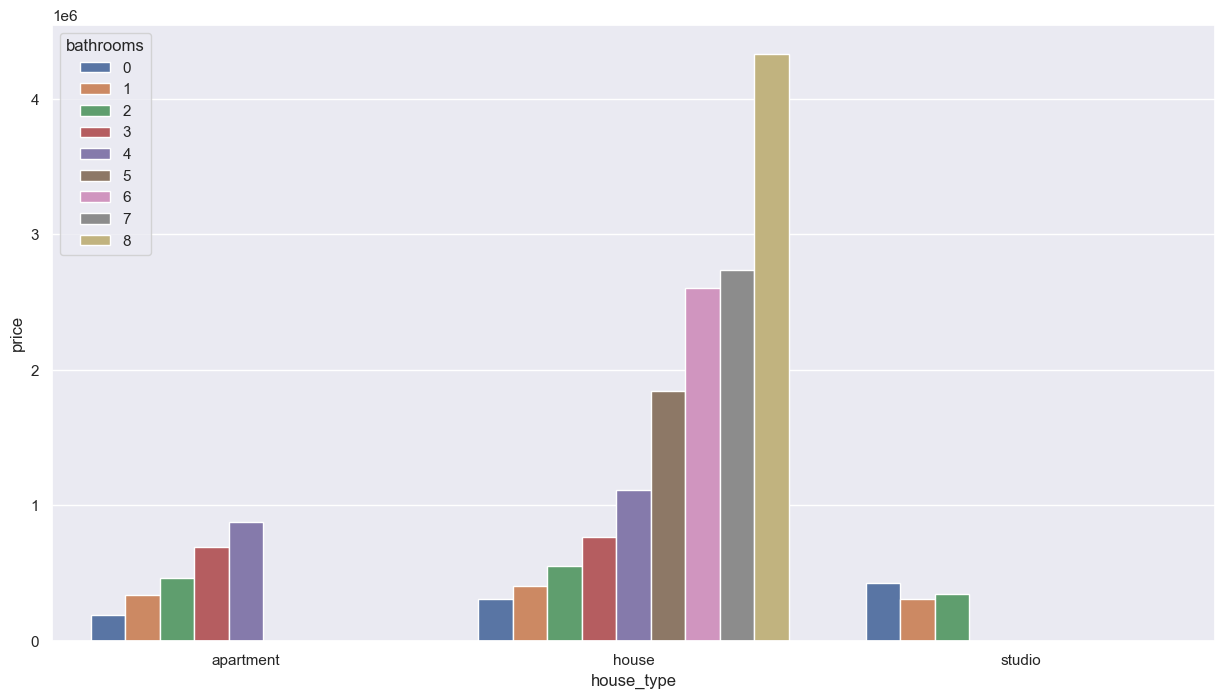

In [16]:
h5 = df2[['price', 'bathrooms', 'house_type']].groupby(['house_type', 'bathrooms']).mean().reset_index()
sns.barplot(data=h5, y='price', x='house_type', hue='bathrooms');

### H6 - In winter, property prices are cheaper than in summer.
* Partially true. True for 'apartment' and 'house', false for 'studio'

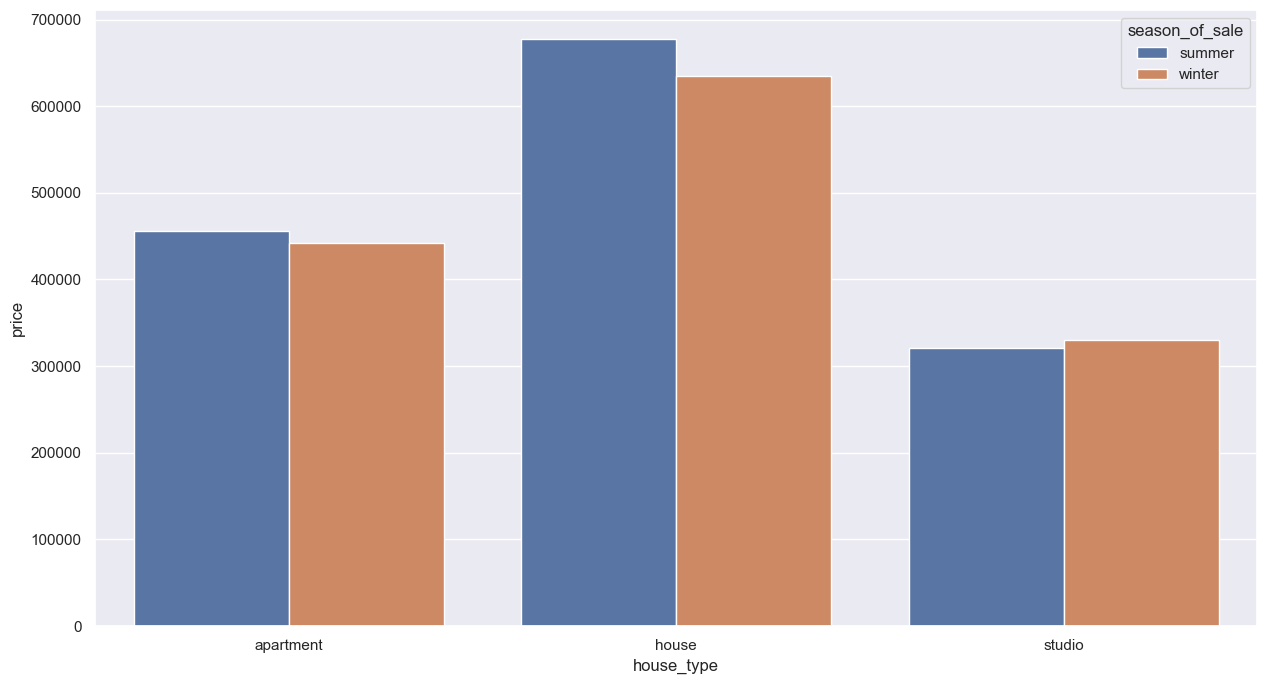

In [17]:
h6 = df2[['price', 'house_type', 'season_of_sale']][(df2['season_of_sale']=='winter') | (df2['season_of_sale']=='summer')] \
     .groupby(['season_of_sale', 'house_type']).mean().reset_index()
sns.barplot(data=h6, x='house_type', y='price', hue='season_of_sale');

### H7 - Older properties are cheaper than newer properties.
* False. The age of the property does not seem to influence the determination of its price.

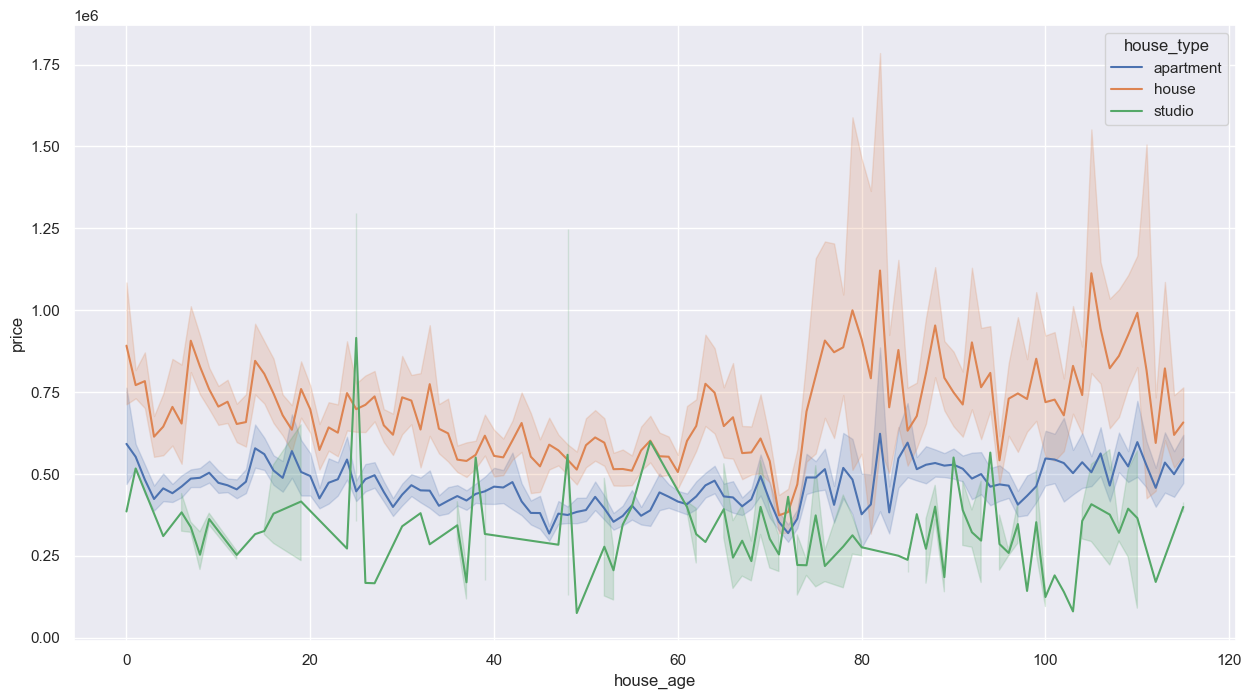

In [18]:
sns.lineplot(data=df2, y='price', x='house_age', hue='house_type');

### H8 - Properties that were renovated less than 10 years ago are, on average, 15% more expensive than properties that were not renovated or that were renovated more than 10 years ago.
* False. 

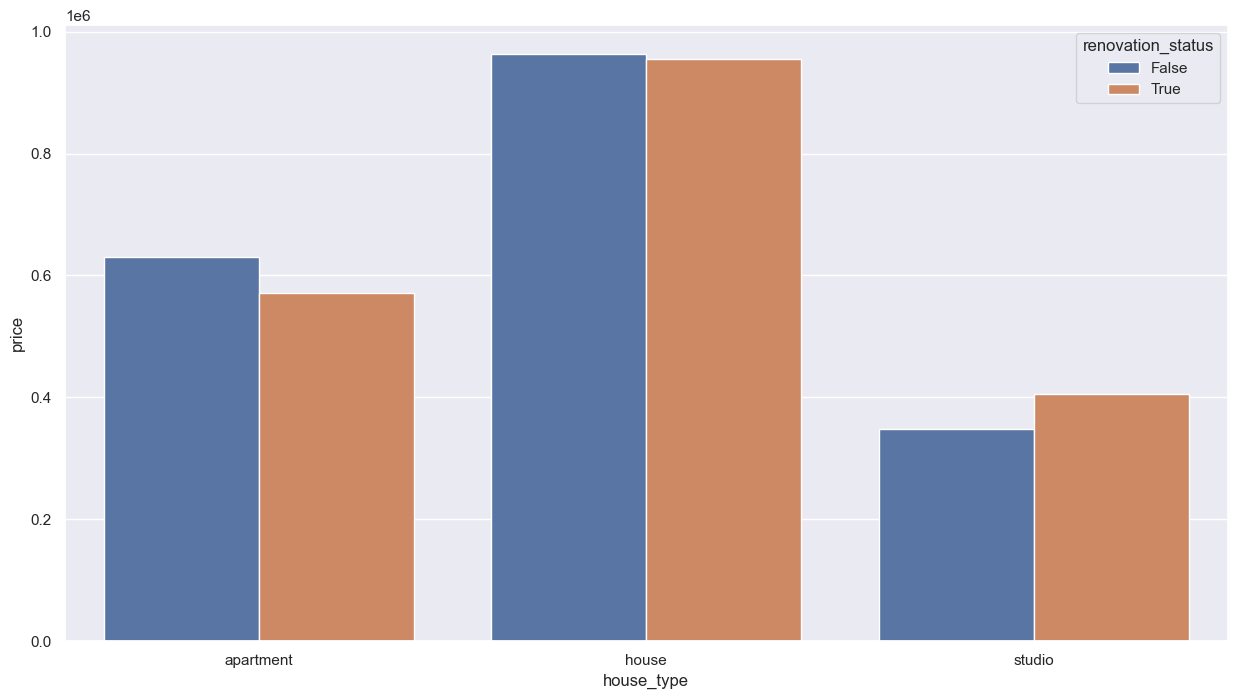

In [19]:
h8 = df2[['price', 'renovation_age', 'house_type']][df2['renovation_age'] > 0]
h8['renovation_status'] = h8['renovation_age'] <= 10 # True para reforma recente, False para reforma há mais de 10 anos

h8_aux = h8[['price', 'house_type', 'renovation_status']].groupby(['house_type', 'renovation_status']).mean().reset_index()
sns.barplot(data=h8_aux, y='price', x='house_type', hue='renovation_status');


### H9 - The season of the year impacts the average property price.
* True. In spring the property average price is higher.


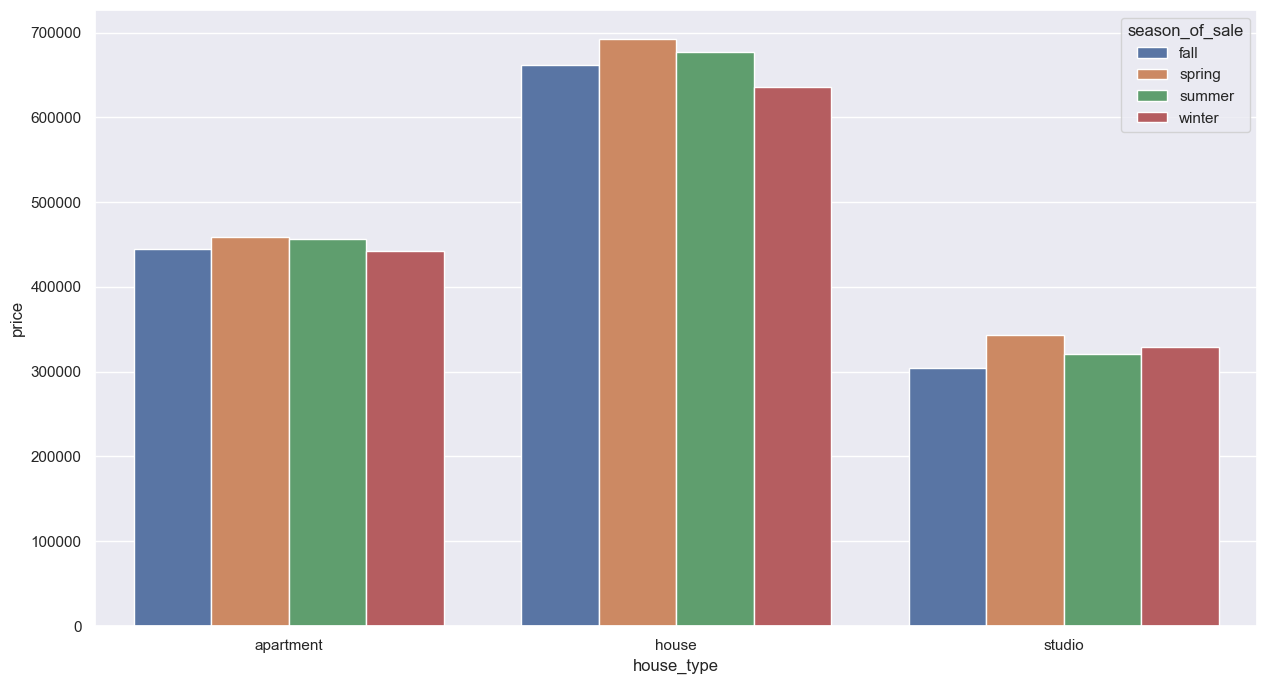

In [20]:
h9 = df2[['price', 'house_type', 'season_of_sale']].groupby(['season_of_sale', 'house_type']).mean().reset_index()
sns.barplot(data=h9, x='house_type', y='price', hue='season_of_sale');

In [21]:
h9= df2[['price', 'house_type', 'season_of_sale']].groupby(['house_type', 'season_of_sale']).mean().reset_index()

for i, j in h9.iterrows():
    if j['house_type'] == 'apartment':
        h9.loc[i, '%_diff'] = (j['price'] / 459178.55)

    elif j['house_type'] == 'house':
        h9.loc[i, '%_diff'] = (j['price'] / 692112.98)

    else:
        h9.loc[i, '%_diff'] = (j['price'] / 342808.82)

h9

,house_type,season_of_sale,price,%_diff
0,apartment,fall,444647.80,0.97
1,apartment,spring,459178.55,1.00
2,apartment,summer,456283.21,0.99
3,apartment,winter,442186.94,0.96
4,house,fall,661864.61,0.96
5,house,spring,692112.98,1.00
6,house,summer,677227.17,0.98
7,house,winter,635348.54,0.92
8,studio,fall,304839.15,0.89
9,studio,spring,342808.82,1.00


# Business Questions

## BQ01 - What properties should House Rocket buy and at what price?

In [22]:
bq1 = df2[['id', 'price', 'zipcode', 'view', 'condition_evaluation', 'season_of_sale', 'house_type']]\
         [(df2['view'] > 2) & (df2['condition_evaluation'] == '2_regular')]

bq1_aux = bq1[['zipcode', 'price']].groupby('zipcode').median().reset_index()

bq1_merged = pd.merge(bq1, bq1_aux, on='zipcode', how='inner')
bq1_merged = bq1_merged.rename(columns={'price_x':'price', 'price_y':'median_price'})

for i, j in bq1_merged.iterrows():
    if ((j['price'] < j['median_price']) & (j['season_of_sale'] == 'winter'))\
        or ((j['house_type'] == 'studio') & (j['price'] < j['median_price']) & (j['season_of_sale'] == 'fall')):
        bq1_merged.loc[i, 'buy?'] = 'yes'
    else:
        bq1_merged.loc[i, 'buy?'] = 'no'

to_buy = bq1_merged[bq1_merged['buy?'] == 'yes'].reset_index(drop=True)
to_buy.to_csv('datasets\\properties_to_buy.csv', index=False)
to_buy


,id,price,zipcode,view,condition_evaluation,season_of_sale,house_type,median_price,buy?
0,9297300055,650000.00,98126,3,2_regular,winter,house,681707.00,yes
1,46100204,1505000.00,98040,3,2_regular,winter,house,1705000.00,yes
2,2175100055,1700000.00,98040,3,2_regular,winter,house,1705000.00,yes
3,3625059071,899000.00,98008,3,2_regular,winter,house,1377500.00,yes
4,1516000055,650000.00,98166,3,2_regular,winter,apartment,784975.00,yes
...,...,...,...,...,...,...,...,...,...
57,7129302800,420000.00,98118,4,2_regular,winter,apartment,805000.00,yes
58,1604601855,360500.00,98118,3,2_regular,winter,apartment,805000.00,yes
59,5153200150,345000.00,98023,3,2_regular,winter,apartment,552700.00,yes
60,2323089065,800000.00,98045,4,2_regular,winter,house,815000.00,yes


## BQ02 - Once purchased, when is the best time to sell it and at what price?

In [23]:
for i, j in to_buy.iterrows():
    if j['house_type'] == 'apartment':
        to_buy.loc[i, 'sell_price'] = j['price'] * 1.037
       
    elif j['house_type'] == 'house':
        to_buy.loc[i, 'sell_price'] = j['price'] * 1.082
        
    else:
        to_buy.loc[i, 'sell_price'] = j['price'] * 1.111

to_buy['profit'] = to_buy['sell_price'] - to_buy['price']

profit = round(to_buy['profit'].sum(),2)

## Finance result

##### Conditions to buy

* View quality > 2
* building condition = Regular
* Price < median of price
* For sale in winter (house and apartment) or for sale in fall(studio)

##### Conditions to sell


* % increase corresponding to the average difference in prices practiced in winter and spring (house and apartment)\
or fall and spring(studio).

##### Finance result

In [24]:
print(f'O desembolso total para compra dos imóveis selecionados foi de ${to_buy["price"].sum()}\n'
      f'A receita total após a venda dos imóveis foi de ${round(to_buy["sell_price"].sum(),2)}\n'
      f'O lucro após a venda de todos os imóveis comprados foi de ${profit}')

O desembolso total para compra dos imóveis selecionados foi de $45977490.0
A receita total após a venda dos imóveis foi de $49066810.13
O lucro após a venda de todos os imóveis comprados foi de $3089320.13


## Hypothesis Resume

In [25]:
hr = [['Hypothesis', 'Result', 'Comment'],
['H1', 'True', '--'],
['H2', 'False', 'Price difference is bigger than 10% in some cases or negative in other cases'],
['H3', 'False', 'Smaller lots has higher price'],
['H4', 'False', 'The price increase is more than 20%.'],
['H5', 'False', 'The price increase is more than 5%.'],
['H6', 'Partially true', 'True for "apartment" and "house", false for "studio".'],
['H7', 'False', 'The age of the property does not seem to influence the determination of its price.'],
['H8', 'False', 'The age of renovations does not seem to influence the determination of its price.'],
['H9', 'True', 'In spring the property average price is higher.']]

print(tabulate(hr, headers='firstrow'))

Hypothesis    Result          Comment
------------  --------------  ----------------------------------------------------------------------------------
H1            True            --
H2            False           Price difference is bigger than 10% in some cases or negative in other cases
H3            False           Smaller lots has higher price
H4            False           The price increase is more than 20%.
H5            False           The price increase is more than 5%.
H6            Partially true  True for "apartment" and "house", false for "studio".
H7            False           The age of the property does not seem to influence the determination of its price.
H8            False           The age of renovations does not seem to influence the determination of its price.
H9            True            In spring the property average price is higher.
